# Übungsblatt 4

Lernziele:
- Klassifikation mit Support Vector Machines (SVM)



In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # transform labels into numbers
    le = preprocessing.LabelEncoder()
    le.fit(y)

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = le.transform(Z)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples.csv' ein!

In [5]:
import pandas as pd
pData = pd.read_csv('2d_samples.csv', header=0)
pData.set_index("Label")
pData.head()

x1        x2 Label
0  30.5905  11.30740     A
1  28.6456  10.42340     A
2  28.2756  10.18550     A
3  25.9744   8.50403     A
4  28.5634  10.92670     A

Schritt 2: Trainieren Sie eine Support Vector Machine mit linearem Kernel. Verwenden Sie hierbei das Modul SciKit Learn (sklearn). Überprüfen Sie den Klassifikator, indem Sie die Muster der Trainingsstichprobe klassifizieren.

In [6]:
from sklearn import svm
X = pData.loc[:, ["x1","x2"]].values
y = pData.loc[:, ['Label']].values
y = y.ravel()
classifier = svm.LinearSVC(max_iter=5000)
classifier.fit(X,y)

pData["predicted"] = classifier.predict(pData.loc[:,["x1","x2"]].values)
pData.head()

c:\users\micha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


x1        x2 Label predicted
0  30.5905  11.30740     A         A
1  28.6456  10.42340     A         A
2  28.2756  10.18550     A         A
3  25.9744   8.50403     A         A
4  28.5634  10.92670     A         A

Schritt 3: Plotten Sie das Ergebnis der Klassifikation mit Hilfe der oben zur Verfügung gestellten Funktion *plot_decision_regions()*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


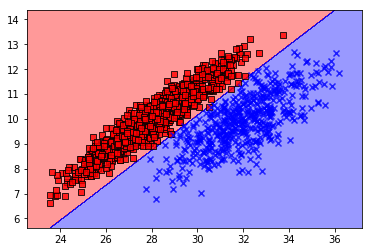

In [7]:
plot_decision_regions(X,pData.loc[:,"predicted"],classifier)

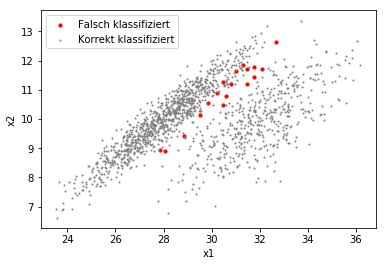

In [10]:
pData.set_index("predicted")
plt.scatter(pData.loc[pData.predicted != pData.Label,'x1'].values, pData.loc[pData.predicted != pData.Label,'x2'].values, color='red', label='Falsch klassifiziert', s=10)
plt.scatter(pData.loc[pData.predicted == pData.Label,'x1'].values, pData.loc[pData.predicted == pData.Label,'x2'].values, color='gray', label='Korrekt klassifiziert', s=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()